In [3]:
# Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime

In [4]:
# Load excel file into pandas dataframe
df = pd.read_excel("PackageWiseAdmission.xlsx", index_col=None)
df.dropna(subset=['Course Package'], inplace=True)
#df = df[(df['Lead Stage'] != 'Dropped Out') & (df['Admission Status'] != 'Dropped Out')]

In [5]:
# Inspect dataframe
df.columns
df.dtypes
df.shape
df.isnull().sum()

Course Package                       0
Academic Year                        0
Enquiry Date                         0
Registration No.                     0
Admission Batch                      1
Training Program Funding Source      5
Start Date                           0
Expected End Date                    0
Admission Date                       0
Student Name                         0
Lead Source                          0
Counsellor                           0
Counselor email                    108
Gender                               2
Admission Status                     0
State                                0
Status Date                          0
Lead Stage                           0
Package Amount                       0
Placement Salary Range             315
Placement Job Title                248
Placement Information              150
Placement Employer                 244
Placement Remark                   208
Assigned Career center               0
dtype: int64

In [7]:
# Simplify package names by eliminating unnecessary characters and words
df["Course Package"] = df["Course Package"].apply(lambda x: x.split('_', 1)[1] if '_' in str(x) else x)
df["Course Package"] = df["Course Package"].apply(lambda x: x.split('_Pack')[0] if '_Package' in str(x) else x)
df["Course Package"] = df["Course Package"].apply(lambda x: x.split('_', 1)[1] if '_' in str(x) else x)
df["Lead Source"] = df["Lead Source"].apply(lambda x: x.split('_')[1] if '_' in str(x) else x)

In [11]:
df.columns

Index(['Course Package', 'Academic Year', 'Enquiry Date', 'Registration No.',
       'Admission Batch', 'Training Program Funding Source', 'Start Date',
       'Expected End Date', 'Admission Date', 'Student Name', 'Lead Source',
       'Counsellor', 'Counselor email', 'Gender', 'Admission Status', 'State',
       'Status Date', 'Lead Stage', 'Package Amount', 'Placement Salary Range',
       'Placement Job Title', 'Placement Information', 'Placement Employer',
       'Placement Remark', 'Assigned Career center'],
      dtype='object')

In [12]:
df.rename(columns={"Enquiry Date": "Inquiry Date"}, inplace=True)

In [13]:
# Transform the date columns into the datetime data type
date_columns = ['Inquiry Date','Start Date','Expected End Date']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [14]:
df.columns

Index(['Course Package', 'Academic Year', 'Inquiry Date', 'Registration No.',
       'Admission Batch', 'Training Program Funding Source', 'Start Date',
       'Expected End Date', 'Admission Date', 'Student Name', 'Lead Source',
       'Counsellor', 'Counselor email', 'Gender', 'Admission Status', 'State',
       'Status Date', 'Lead Stage', 'Package Amount', 'Placement Salary Range',
       'Placement Job Title', 'Placement Information', 'Placement Employer',
       'Placement Remark', 'Assigned Career center'],
      dtype='object')

In [15]:
# Convert the data in the Placement Information column to 1 when it indicates Yes and 0 when it indicates No
# DO NOT RUN THIS CELL MORE THAN ONCE!!!
df["Placement Information"].isnull().sum()
df['Placement Information'] = df['Placement Information'].apply(lambda x: 1 if x == 'Yes' else 0)

In [16]:
# The criteria is limited to students who completed their studies prior to June 30th, 2023
df = df[~(df['Expected End Date'] >= pd.Timestamp(datetime.date(2024, 6, 30)))]

In [17]:
# Assign variables to represent the fiscal year end dates according to the corresponding years
end_2019 = pd.Timestamp(datetime.date(2019, 6, 30))
end_2020 = pd.Timestamp(datetime.date(2020, 6, 30))
end_2021 = pd.Timestamp(datetime.date(2021, 6, 30))
end_2022 = pd.Timestamp(datetime.date(2022, 6, 30))
end_2023 = pd.Timestamp(datetime.date(2023, 6, 30))

In [18]:
end_2019 = pd.Timestamp(datetime.date(2019, 6, 30))
end_2020 = pd.Timestamp(datetime.date(2020, 6, 30))
end_2021 = pd.Timestamp(datetime.date(2021, 6, 30))
end_2022 = pd.Timestamp(datetime.date(2022, 6, 30))
end_2023 = pd.Timestamp(datetime.date(2023, 6, 30))
end_2024 = pd.Timestamp(datetime.date(2024, 6, 30))

In [19]:
# Create a function that applies conditions to assign dates to their respective Fiscal Years
def fiscal_year(date):
    if date <= end_2019:
        return '2018'
    elif date <= end_2020:
        return '2019'
    elif date <= end_2021:
        return '2020'
    elif date <= end_2022:
        return '2021'
    elif date <= end_2023:
        return '2022'
    elif date <= end_2024:
        return '2023'
    else:
        return '2024'

In [20]:
df.columns

Index(['Course Package', 'Academic Year', 'Inquiry Date', 'Registration No.',
       'Admission Batch', 'Training Program Funding Source', 'Start Date',
       'Expected End Date', 'Admission Date', 'Student Name', 'Lead Source',
       'Counsellor', 'Counselor email', 'Gender', 'Admission Status', 'State',
       'Status Date', 'Lead Stage', 'Package Amount', 'Placement Salary Range',
       'Placement Job Title', 'Placement Information', 'Placement Employer',
       'Placement Remark', 'Assigned Career center'],
      dtype='object')

In [21]:
# Generate two columns for associating enrollment dates and end dates with a fiscal year
df['Enrolled FY'] = df['Start Date'].apply(fiscal_year)
df['Exited FY'] = df['Expected End Date'].apply(fiscal_year)

/var/folders/pg/g6tg_cg936vg7skkz0z1140w0000gn/T/ipykernel_53024/4216016055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Enrolled FY'] = df['Start Date'].apply(fiscal_year)
/var/folders/pg/g6tg_cg936vg7skkz0z1140w0000gn/T/ipykernel_53024/4216016055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Exited FY'] = df['Expected End Date'].apply(fiscal_year)


In [22]:
# Filter out records where the expected end date is past today's date and Placement Information is 0
current_date = pd.Timestamp(datetime.datetime.now().date())
filtered_df = df[(df['Expected End Date'] < current_date) | (df['Placement Information'] == 1)]

In [46]:
# Save the data to an Excel file for additional analysis using Tableau
#filtered_df.to_excel('Current Year Performance_final.xlsx', index=False)

In [23]:
df.set_index('Inquiry Date', inplace=True)

In [27]:
inquiries_per_year = df['Student Name'].resample('AS').count()
admissions_per_year = df[df['Admission Date'].notnull()]['Student Name'].resample('AS').count()


In [28]:
admissions_per_year

Inquiry Date
2018-01-01    34
2019-01-01    49
2020-01-01    44
2021-01-01    59
2022-01-01    86
2023-01-01    83
2024-01-01     4
Freq: AS-JAN, Name: Student Name, dtype: int64

In [29]:
inquiries_per_year

Inquiry Date
2018-01-01    34
2019-01-01    49
2020-01-01    44
2021-01-01    59
2022-01-01    86
2023-01-01    83
2024-01-01     4
Freq: AS-JAN, Name: Student Name, dtype: int64

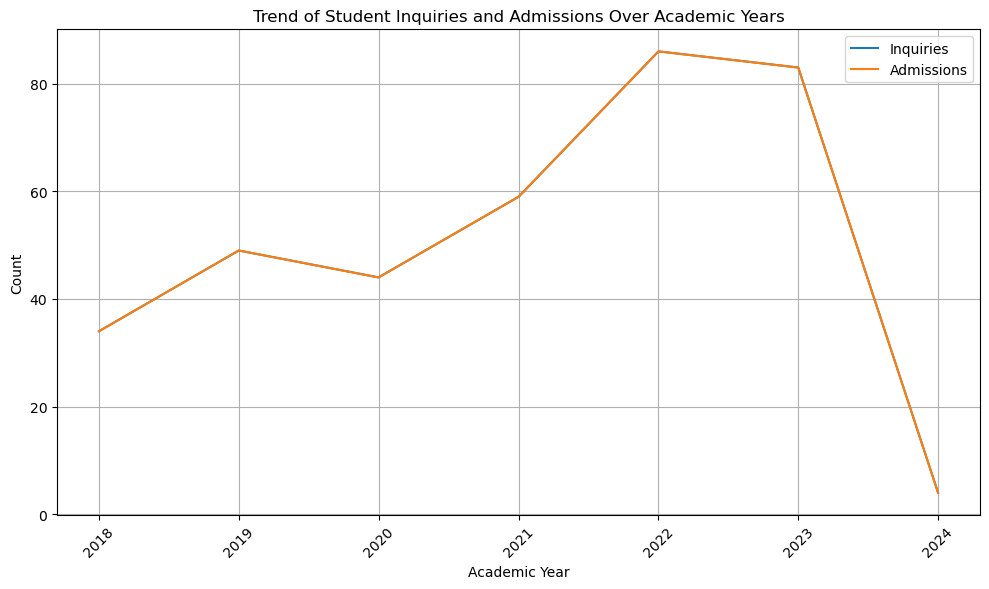

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(inquiries_per_year.index, inquiries_per_year.values, label='Inquiries')
plt.plot(admissions_per_year.index, admissions_per_year.values, label='Admissions')
plt.title('Trend of Student Inquiries and Admissions Over Academic Years')
plt.xlabel('Academic Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()